In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
# This works for labelling because the file name for cats begins with an upper case whereas for dogs it begins with a lowercase
def label_func(f): return f[0].isupper()

In [5]:
files = get_image_files(path/"images")
len(files)

7390

In [6]:
files[0]

Path('/home/loganhartford/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_54.jpg')

In [7]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

/home/loganhartford/mambaforge/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


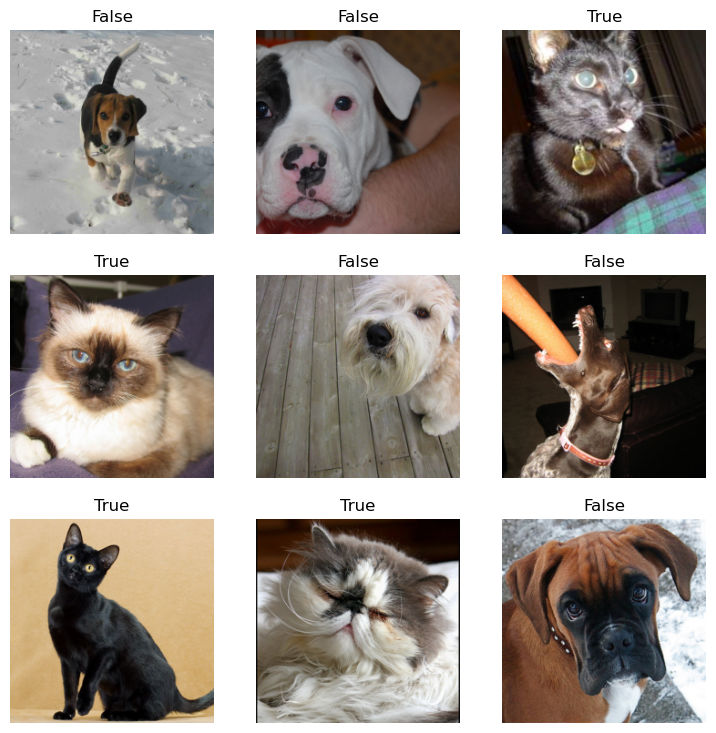

In [8]:
dls.show_batch()

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

/home/loganhartford/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/loganhartford/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/loganhartford/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:07<00:00, 6.11MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.170667,0.038577,0.012179,02:56


epoch,train_loss,valid_loss,error_rate,time
0,0.069879,0.023482,0.010825,04:09


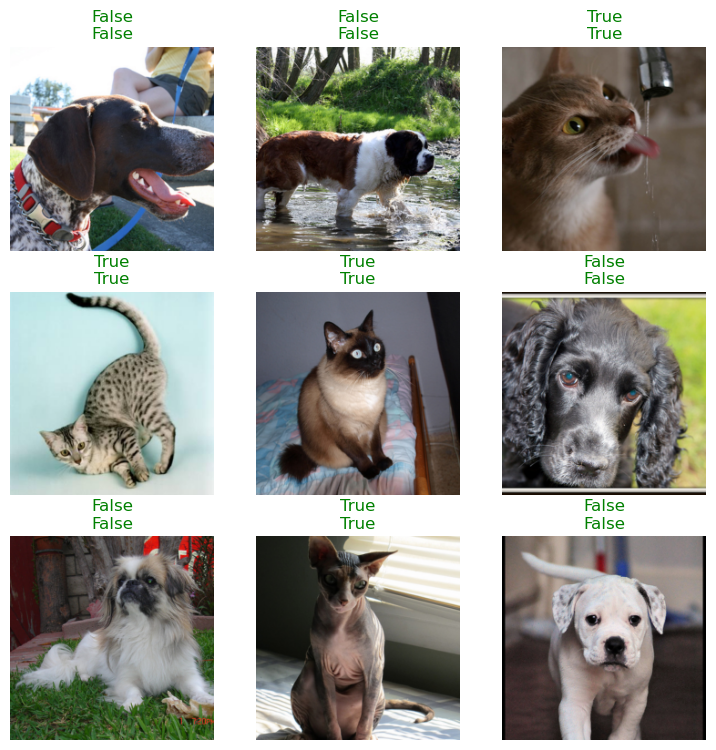

In [10]:
learn.show_results()